In [253]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [432]:
feature_columns = ['Test1 Marks', 'Test2 Marks', 'Admitted/Not-Admitted']
df = pd.read_csv("../Datasets/Logistic.csv", header=None)
df.columns = feature_columns
X = df.iloc[:, :-1]
y = df.iloc[:, 2]
theta = np.zeros((len(X), 1))

In [433]:
alpha = 0.01
epochs = 100

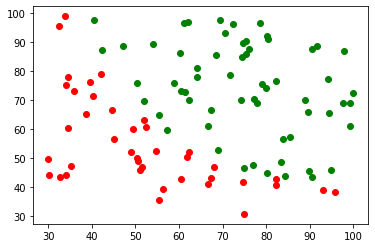

In [434]:
mask_notAdm = X[y == 0]

mask_adm = X[y == 1]
plt.plot(mask_adm['Test1 Marks'], mask_adm['Test2 Marks'], 'o', color='green')
plt.plot(mask_notAdm['Test1 Marks'], mask_notAdm['Test2 Marks'], 'o', color='red')

In [435]:
(m, n) = np.shape(X)
X = np.column_stack((np.ones(len(X)), X))

In [436]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [437]:
def cost(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

In [438]:
def gradientDescent(X, y, alpha, epochs):
    theta = np.zeros(np.shape(X[1]))
    descent = []
    
    for i in range(epochs):
        z = np.dot(X, theta)
        h = sigmoid(z)
        gradient = np.dot(X.T, (h - y)) / y.size
        theta -= 0.0001 * gradient
        
        z = np.dot(X, theta)
        h = sigmoid(z)
        loss = cost(h, y)
        
        if i % 100 == 0:
            descent.append(loss)
            print(f'Cost : {loss}\t', f'Weights : {theta}\t')
    return descent, theta

In [439]:
Gdescent, theta = gradientDescent(X, y, alpha, epochs)

Cost : 0.6690967609080577	 Weights : [1.00000000e-05 1.20092166e-03 1.12628422e-03]	


In [442]:
theta[1]

0.008177052912694764

Text(0, 0.5, 'Loss')

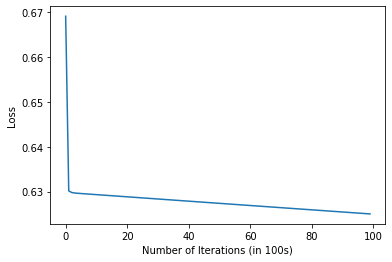

In [389]:
plt.plot(Gdescent, '-')
plt.xlabel("Number of Iterations (in 100s)")
plt.ylabel("Loss")

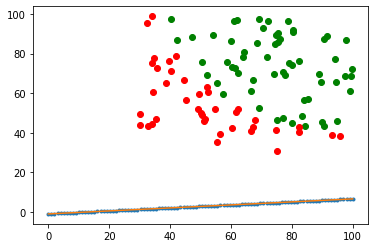

In [455]:
domain =  np.linspace(0,100,100)
plt.plot(mask_adm['Test1 Marks'], mask_adm['Test2 Marks'], 'o', color='green')
plt.plot(mask_notAdm['Test1 Marks'], mask_notAdm['Test2 Marks'], 'o', color='red')
h_x = -(theta[0]/theta[1])*domain - (theta[2]/theta[2])
# plt.plot(domain,h_x)
plt.plot(domain, h_x, '.', domain, h_x, '-')